In [105]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split

In [106]:
clf = DecisionTreeClassifier(random_state=0)
iris = load_iris() # 鸢尾花数据集
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head(10)

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [107]:
data = np.array(df.iloc[:, [0, 1, -1]])
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 留出法划分数据集

In [108]:
tree = DecisionTreeClassifier(min_samples_leaf=4)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [109]:
def plot_decision_boundary(model, axis):
    """绘制决策边界"""
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['yellow', 'white', 'red'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.contour(x0, x1, zz, colors='black', linewidths=1)
    

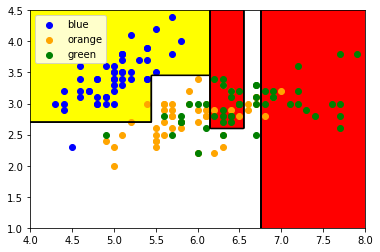

In [110]:
# CART决策树可以解决多分类问题
plot_decision_boundary(tree, axis=[4.0, 8.0, 1.0, 4.5])
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='blue')
plt.scatter(X[y==1, 0], X[y==1, 1], color='orange', label='orange')
plt.scatter(X[y==2, 0], X[y==2, 1], color='green', label='green')
plt.legend()
plt.show()

In [111]:
tree.score(X_train, y_train) # Return the mean accuracy on the given test data and labels. 

0.8083333333333333

In [112]:
tree.predict(X_train) # Predict class or regression value for X.

array([0., 0., 2., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 2., 0., 1., 2.,
       0., 1., 2., 2., 2., 1., 1., 1., 1., 0., 2., 0., 0., 2., 2., 0., 1.,
       1., 2., 1., 2., 2., 1., 0., 1., 1., 2., 2., 2., 1., 2., 1., 1., 1.,
       1., 2., 2., 1., 0., 2., 1., 0., 1., 1., 1., 0., 1., 2., 1., 0., 2.,
       0., 0., 0., 1., 0., 1., 0., 0., 2., 2., 2., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 2., 1., 0., 2., 1., 1., 0., 1., 0.,
       2., 2., 2., 2., 1., 1., 2., 0., 2., 0., 1., 2., 1., 1., 1., 1., 0.,
       2.])

In [ ]:
# 预测结果可以输出为概率向量
tree.predict_proba(X_train) # Predict class probabilities of the input samples X. 

In [113]:
tree.score(X_test, y_test) # Returns the mean accuracy on the given test data and labels.

0.8666666666666667